In [3]:
import numpy as np
from scipy.optimize import minimize_scalar

def testowa_funkcja(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

def gradient_testowej_funkcji(x):
    df_dx1 = 2 * (x[0] + 2*x[1] - 7) + 4 * (2*x[0] + x[1] - 5)
    df_dx2 = 4 * (x[0] + 2*x[1] - 7) + 2 * (2*x[0] + x[1] - 5)
    return np.array([df_dx1, df_dx2])

def hessian_testowej_funkcji(x):
    df_dx1_dx1 = 2 + 4
    df_dx1_dx2 = df_dx2_dx1 = 4 + 2
    df_dx2_dx2 = 4 + 2
    return np.array([[df_dx1_dx1, df_dx1_dx2], [df_dx2_dx1, df_dx2_dx2]])

def stala_dlugosc_kroku(x, gradient, krok):
    return x - krok * gradient

def zmienna_dlugosc_kroku(x, gradient):
    res = minimize_scalar(lambda alpha: testowa_funkcja(x - alpha * gradient))
    return x - res.x * gradient

def golden_ratio_search(func, a, b, tol=1e-5):
    gr = (np.sqrt(5) + 1) / 2  # Stała złotego podziału
    c = b - (b - a) / gr
    d = a + (b - a) / gr

    while abs(c - d) > tol:
        if func(c) < func(d):
            b = d
        else:
            a = c

        c = b - (b - a) / gr
        d = a + (b - a) / gr

    return (b + a) / 2

def steepest_descent(starting_point, tolerance, max_iterations, krok):
    x = starting_point
    for i in range(max_iterations):
        gradient = gradient_testowej_funkcji(x)
        x = stala_dlugosc_kroku(x, gradient, krok)
        if np.linalg.norm(gradient) < tolerance:
            break
    return x

def conjugate_gradients(starting_point, tolerance, max_iterations):
    x = starting_point
    gradient = gradient_testowej_funkcji(x)
    direction = -gradient
    for i in range(max_iterations):
        gradient = gradient_testowej_funkcji(x)
        beta = np.dot(gradient, gradient) / np.dot(direction, direction)
        direction = -gradient + beta * direction
        x = stala_dlugosc_kroku(x, direction, 0.05)
        if np.linalg.norm(gradient) < tolerance:
            break
    return x

def newtons_method(starting_point, tolerance, max_iterations):
    x = starting_point
    for i in range(max_iterations):
        gradient = gradient_testowej_funkcji(x)
        hessian_inv = np.linalg.pinv(hessian_testowej_funkcji(x))
        direction = -np.dot(hessian_inv, gradient)
        x = stala_dlugosc_kroku(x, direction, 0.12)
        if np.linalg.norm(gradient) < tolerance:
            break
    return x

def steepest_descent_variable_step(starting_point, tolerance, max_iterations):
    x = starting_point
    for i in range(max_iterations):
        gradient = gradient_testowej_funkcji(x)
        x = zmienna_dlugosc_kroku(x, gradient)
        if np.linalg.norm(gradient) < tolerance:
            break
    return x

def conjugate_gradients_variable_step(starting_point, tolerance, max_iterations):
    x = starting_point
    gradient = gradient_testowej_funkcji(x)
    direction = -gradient
    for i in range(max_iterations):
        gradient = gradient_testowej_funkcji(x)
        beta = np.dot(gradient, gradient) / np.dot(direction, direction)
        direction = -gradient + beta * direction
        x = zmienna_dlugosc_kroku(x, direction)
        if np.linalg.norm(gradient) < tolerance:
            break
    return x

def newtons_method_variable_step(starting_point, tolerance, max_iterations):
    x = starting_point
    for i in range(max_iterations):
        gradient = gradient_testowej_funkcji(x)
        hessian_inv = np.linalg.pinv(hessian_testowej_funkcji(x))
        direction = -np.dot(hessian_inv, gradient)
        x = zmienna_dlugosc_kroku(x, direction)
        if np.linalg.norm(gradient) < tolerance:
            break
    return x

# Przykładowe użycie
starting_point = np.array([0.0, 0.0])
tolerance = 1e-5
max_iterations = 1000

print("Metoda najszybszego spadku (stałokrokowa):", steepest_descent(starting_point, tolerance, max_iterations, 0.05))
print("Metoda najszybszego spadku (zmiennokrokowa):", steepest_descent_variable_step(starting_point, tolerance, max_iterations))

print("Metoda gradientów sprzężonych (stałokrokowa):", conjugate_gradients(starting_point, tolerance, max_iterations))
print("Metoda gradientów sprzężonych (zmiennokrokowa):", conjugate_gradients_variable_step(starting_point, tolerance, max_iterations))

print("Metoda Newtona (stałokrokowa):", newtons_method(starting_point, tolerance, max_iterations))
print("Metoda Newtona (zmiennokrokowa):", newtons_method_variable_step(starting_point, tolerance, max_iterations))


Metoda najszybszego spadku (stałokrokowa): [1.00000291 2.99999709]
Metoda najszybszego spadku (zmiennokrokowa): [1.         2.99999999]
Metoda gradientów sprzężonych (stałokrokowa): [nan nan]
Metoda gradientów sprzężonych (zmiennokrokowa): [1.00000026 2.99999971]
Metoda Newtona (stałokrokowa): [-1.52418366e+72 -1.52418366e+72]
Metoda Newtona (zmiennokrokowa): [2. 2.]


/var/folders/h5/64qykf294zn3ggth49z4d8pm0000gn/T/ipykernel_27242/4128246293.py:56: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.dot(gradient, gradient) / np.dot(direction, direction)


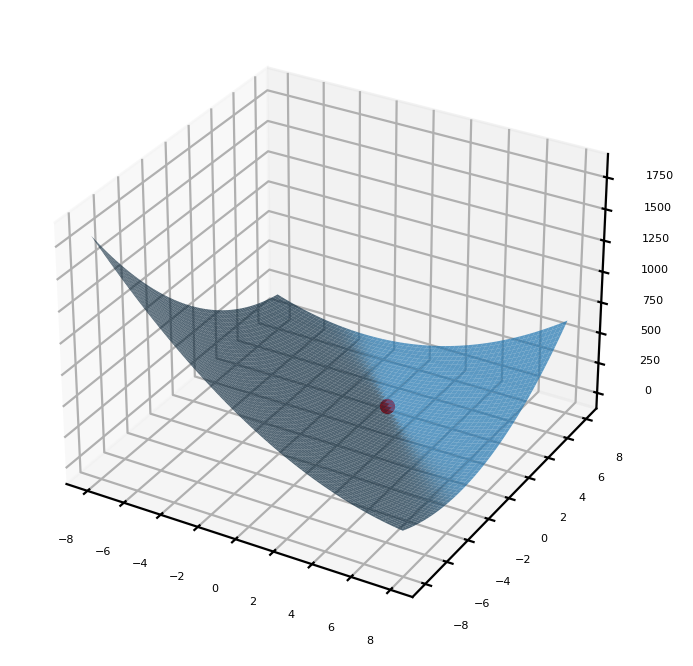

In [11]:
import numpy as np
import matplotlib.pyplot as plot


radius = 8                                  # working plane radius
global_epsilon = 0.0001                # argument increment for derivative
centre = (global_epsilon, global_epsilon)   # centre of the working circle
arr_shape = 100                             # number of points processed / 360
step = 0.05         # step between two points

def differentiable_function(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

    # return np.sin(x) * np.exp((1 - np.cos(y)) ** 2) + \
    #        np.cos(y) * np.exp((1 - np.sin(x)) ** 2) + (x - y) ** 2


def rotate_vector(length, a):
    return length * np.cos(a), length * np.sin(a)


def derivative_x(epsilon, arg):
    return (differentiable_function(global_epsilon + epsilon, arg) -
            differentiable_function(epsilon, arg)) / global_epsilon


def derivative_y(epsilon, arg):
    return (differentiable_function(arg, epsilon + global_epsilon) -
            differentiable_function(arg, epsilon)) / global_epsilon


def calculate_flip_points():
    flip_points = np.array([0, 0])
    points = np.zeros((360, arr_shape), dtype=bool)
    cx, cy = centre

    for i in range(arr_shape):
        for alpha in range(360):
            x, y = rotate_vector(step, alpha)
            x = x * i + cx
            y = y * i + cy
            points[alpha][i] = derivative_x(x, y) + derivative_y(y, x) > 0
            if not points[alpha][i - 1] and points[alpha][i]:
                flip_points = np.vstack((flip_points, np.array([alpha, i - 1])))

    return flip_points


def pick_estimates(positions):
    vx, vy = rotate_vector(step, positions[1][0])
    cx, cy = centre
    best_x, best_y = cx + vx * positions[1][1], cy + vy * positions[1][1]

    for index in range(2, len(positions)):
        vx, vy = rotate_vector(step, positions[index][0])
        x, y = cx + vx * positions[index][1], cy + vy * positions[index][1]
        if differentiable_function(best_x, best_y) > differentiable_function(x, y):
            best_x = x
            best_y = y

    for index in range(360):
        vx, vy = rotate_vector(step, index)
        x, y = cx + vx * (arr_shape - 1), cy + vy * (arr_shape - 1)
        if differentiable_function(best_x, best_y) > differentiable_function(x, y):
            best_x = x
            best_y = y

    return best_x, best_y


def gradient_descent(best_estimates, is_x):
    derivative = derivative_x if is_x else derivative_y
    best_x, best_y = best_estimates
    descent_step = step
    value = derivative(best_y, best_x)

    while abs(value) > global_epsilon:
        descent_step *= 0.95
        best_y = best_y - descent_step \
            if derivative(best_y, best_x) > 0 else best_y + descent_step
        value = derivative(best_y, best_x)

    return best_y, best_x


def find_minimum():
    return gradient_descent(gradient_descent(pick_estimates(calculate_flip_points()), False), True)


def get_grid(grid_step):
    samples = np.arange(-radius, radius, grid_step)
    x, y = np.meshgrid(samples, samples)
    return x, y, differentiable_function(x, y)


def draw_chart(point, grid):
    point_x, point_y, point_z = point
    grid_x, grid_y, grid_z = grid
    plot.rcParams.update({
        'figure.figsize': (4, 4),
        'figure.dpi': 200,
        'xtick.labelsize': 4,
        'ytick.labelsize': 4
    })
    ax = plot.figure().add_subplot(111, projection='3d')
    ax.scatter(point_x, point_y, point_z, color='red')
    ax.plot_surface(grid_x, grid_y, grid_z, rstride=5, cstride=5, alpha=0.7)
    plot.show()


if __name__ == '__main__':
    min_x, min_y = find_minimum()
    minimum = (min_x, min_y, differentiable_function(min_x, min_y))
    draw_chart(minimum, get_grid(0.05))

In [33]:
minimum

(0.9829824512947939, 3.021199275582878, 0.0008089536078906578)

In [19]:
min_x, min_y

(0.9829824512947939, 3.021199275582878)

In [24]:
import numpy as np
from scipy.optimize import minimize_scalar

def testowa_funkcja(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

def gradient_testowej_funkcji(x):
    df_dx1 = 2 * (x[0] + 2*x[1] - 7) + 4 * (2*x[0] + x[1] - 5)
    df_dx2 = 4 * (x[0] + 2*x[1] - 7) + 2 * (2*x[0] + x[1] - 5)
    return np.array([df_dx1, df_dx2])

def steepest_descent(starting_point, tolerance, max_iterations, fixed_step=True, step_size=0.05):
    x = starting_point
    for _ in range(max_iterations):
        gradient = gradient_testowej_funkcji(x)
        
        if fixed_step:
            x = x - step_size * gradient
        else:
            res = minimize_scalar(lambda alpha: testowa_funkcja(x - alpha * gradient))
            x = x - res.x * gradient

        if np.linalg.norm(gradient) < tolerance:
            break
    return x

starting_point = np.array([0.0, 0.0])
tolerance = 1e-7
max_iterations = 50000

result_fixed_step = steepest_descent(starting_point, tolerance, max_iterations, fixed_step=True, step_size=0.001)

result_variable_step = steepest_descent(starting_point, tolerance, max_iterations, fixed_step=False)

print("Wynik ze stalym krokim:", result_fixed_step)
print("Wynik ze zmennym krokiem:", result_variable_step)

Wynik ze stalym krokim: [1.00000004 2.99999996]
Wynik ze zmennym krokiem: [1. 3.]


In [39]:
import numpy as np
from scipy.optimize import minimize_scalar

def testowa_funkcja(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

def gradient_testowej_funkcji(x):
    df_dx1 = 2 * (x[0] + 2*x[1] - 7) + 4 * (2*x[0] + x[1] - 5)
    df_dx2 = 4 * (x[0] + 2*x[1] - 7) + 2 * (2*x[0] + x[1] - 5)
    return np.array([df_dx1, df_dx2])

def conjugate_gradients(starting_point, tolerance, max_iterations, fixed_step=True, step_size=0.05):
    x = starting_point
    gradient = gradient_testowej_funkcji(x)
    direction = -gradient

    for i in range(max_iterations):
        gradient = gradient_testowej_funkcji(x)
        beta = np.dot(gradient, gradient) / np.dot(direction, direction)

        if np.abs(beta) < 1e-8:
            break

        if fixed_step:
            x = x + step_size * direction
        else:
            res = minimize_scalar(lambda alpha: testowa_funkcja(x + alpha * direction))
            x = x + res.x * direction

        new_direction = -gradient + beta * direction
        direction = new_direction

        if np.linalg.norm(gradient) < tolerance:
            break

    return x

# Пример использования
starting_point = np.array([0.0, 0.0])
tolerance = 1e-5
max_iterations = 1000

# Используем фиксированный шаг
result_fixed_step = conjugate_gradients(starting_point, tolerance, max_iterations, fixed_step=True, step_size=0.01)

# Используем изменяемый шаг (метод золотого сечения)
result_variable_step = conjugate_gradients(starting_point, tolerance, max_iterations, fixed_step=False)

print("Результат с фиксированным шагом:", result_fixed_step)
print("Результат с изменяемым шагом:", result_variable_step)


Результат с фиксированным шагом: [1.00000341 2.99999659]
Результат с изменяемым шагом: [1.00000197 2.99999773]


/var/folders/h5/64qykf294zn3ggth49z4d8pm0000gn/T/ipykernel_27242/4169141390.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(point[0], point[1], testowa_funkcja(point), color=color, s=size,alpha=1.0 , label=label,  cmap='viridis')


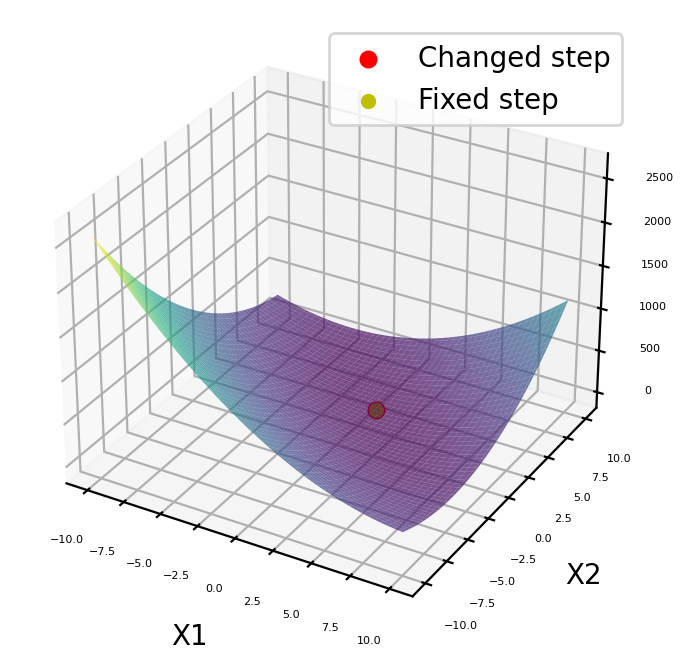

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def testowa_funkcja(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

def plot_3d_function():
    x1 = np.linspace(-10, 10, 100)
    x2 = np.linspace(-10, 10, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Y = testowa_funkcja([X1, X2])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Y, cmap='viridis', alpha=0.7)

    return ax

def plot_point(ax, point, color='r', size=1, label=None):
    ax.scatter(point[0], point[1], testowa_funkcja(point), color=color, s=size,alpha=1.0 , label=label,  cmap='viridis')

ax = plot_3d_function()

point_to_plot = np.array([2, 3])
plot_point(ax, result_variable_step, color='r', size=30, label='Changed step')
plot_point(ax, result_fixed_step, color='y', size=20, label='Fixed step')

ax.set_xlabel('X1')
ax.set_ylabel('X2')

ax.legend()
plt.show()


In [136]:
from numpy.linalg import inv

class Lab4:
    TEST_RUN_COUNT = 0
    GRADIENT_RUN_COUNT = 0
    HESSIAN_RUN_COUNT = 0
    ITERATION_COUNT = 0
    
    def testowa_funkcja(self, x):
        Lab4.TEST_RUN_COUNT+=1
        return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

    def gradient_testowej_funkcji(self, x):
        Lab4.GRADIENT_RUN_COUNT+=1
        df_dx1 = 2 * (x[0] + 2*x[1] - 7) + 4 * (2*x[0] + x[1] - 5)
        df_dx2 = 4 * (x[0] + 2*x[1] - 7) + 2 * (2*x[0] + x[1] - 5)
        return np.array([df_dx1, df_dx2])

    def conjugate_gradients(self, starting_point, tolerance, max_iterations, fixed_step=True, step_size=0.05):
        x = starting_point
        gradient = self.gradient_testowej_funkcji(x)
        direction = -gradient

        for _ in range(max_iterations):
            Lab4.ITERATION_COUNT+=1
            gradient = self.gradient_testowej_funkcji(x)
            beta = np.dot(gradient, gradient) / np.dot(direction, direction)

            if np.abs(beta) < 1e-8:
                break

            if fixed_step:
                x = x + step_size * direction
            else:
                res = minimize_scalar(lambda alpha: self.testowa_funkcja(x + alpha * direction))
                x = x + res.x * direction

            new_direction = -gradient + beta * direction
            direction = new_direction

            if np.linalg.norm(gradient) < tolerance:
                break

        return x
    
    def steepest_descent(self, starting_point, tolerance, max_iterations, fixed_step=True, step_size=0.05):
        x = starting_point
        for _ in range(max_iterations):
            Lab4.ITERATION_COUNT+=1
            gradient = self.gradient_testowej_funkcji(x)
            
            if fixed_step:
                x = x - step_size * gradient
            else:
                res = minimize_scalar(lambda alpha: self.testowa_funkcja(x - alpha * gradient))
                x = x - res.x * gradient

            if np.linalg.norm(gradient) < tolerance:
                break
        return x
    
    def hessian_testowej_funkcji(self, x):
        Lab4.HESSIAN_RUN_COUNT+=1
        d2f_dx1dx1 = 2 + 8
        d2f_dx1dx2 = 4
        d2f_dx2dx1 = 4
        d2f_dx2dx2 = 4 + 2
        return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx2dx1, d2f_dx2dx2]])

    def newton_method(self, starting_point, tolerance, max_iterations, fixed_step=True, step_size=0.05):
        x = starting_point

        for _ in range(max_iterations):
            Lab4.ITERATION_COUNT+=1
            gradient =  self.gradient_testowej_funkcji(x)
            hessian_inv = inv(self.hessian_testowej_funkcji(x))

            if fixed_step:
                x = x - step_size * np.dot(hessian_inv, gradient)
            else:
                res = minimize_scalar(lambda alpha: testowa_funkcja(x - alpha * np.dot(hessian_inv, gradient)))
                x = x - res.x * np.dot(hessian_inv, gradient)

            if np.linalg.norm(gradient) < tolerance:
                break

        return x
    
    def zeroing_out(self):
        Lab4.TEST_RUN_COUNT = 0
        Lab4.GRADIENT_RUN_COUNT = 0
        Lab4.HESSIAN_RUN_COUNT = 0
        Lab4.ITERATION_COUNT = 0
    
    def generate_random_numbers():
        x1 = np.random.uniform(-10, 10)
        x2 = np.random.uniform(-10, 10)
        return x1, x2
    
    def start_calculation(self):
        pd_diict = {'start_x1': [],'start_x2':[], 'step': [],
                    'x1_steepest_descent':[], 'x2_steepest_descent':[], 'y_steepest_descent': [],'f_calls_steepest_descent':[], 'g_calls_steepest_descent':[], 'h_calls_steepest_descent':[], 
                    'x1_conjugate_gradients':[], 'x2_conjugate_gradients':[], 'y_conjugate_gradients':[], 'f_calls_conjugate_gradients':[], 'g_calls_conjugate_gradients':[], 'h_calls_conjugate_gradients':[], 
                    'x1_newton_method':[], 'x2_newton_method':[], 'y_newton_method':[], 'f_calls_newton_method':[], 'g_calls_newton_method':[], 'h_calls_newton_method':[], }
        
        tolerance = 1e-5
        max_iterations = 1000
        for _ in range(100):
            x1, x2 = Lab4.generate_random_numbers()
            starting_point = np.array([x1, x2])
            for step in [['0,12', 0.12], ['0,05',0.05], ['M.zk.', 0.05]]:
                fixed = True if step[0] == '0,12' or step[0] == '0,05' else False
                pd_diict['start_x1'].append(x1)
                pd_diict['start_x2'].append(x2)
                pd_diict['step'].append(step[0])
                
                result_des = self.steepest_descent(starting_point, tolerance, max_iterations, fixed, step[1])
                pd_diict['x1_steepest_descent'].append(result_des[0])
                pd_diict['x2_steepest_descent'].append(result_des[1])
                pd_diict['y_steepest_descent'].append(self.testowa_funkcja(result_des))
                pd_diict['f_calls_steepest_descent'].append(Lab4.TEST_RUN_COUNT)
                pd_diict['g_calls_steepest_descent'].append(Lab4.GRADIENT_RUN_COUNT)
                pd_diict['h_calls_steepest_descent'].append(Lab4.HESSIAN_RUN_COUNT)
                self.zeroing_out()
                
                result_grad = self.conjugate_gradients(starting_point, tolerance, max_iterations, fixed, step[1])
                # pd_diict['start_x1'].append(x1)
                # pd_diict['start_x2'].append(x2)
                # pd_diict['step'].append(step[0])
                pd_diict['x1_conjugate_gradients'].append(result_grad[0])
                pd_diict['x2_conjugate_gradients'].append(result_grad[1])
                pd_diict['y_conjugate_gradients'].append(self.testowa_funkcja(result_grad))
                pd_diict['f_calls_conjugate_gradients'].append(Lab4.TEST_RUN_COUNT)
                pd_diict['g_calls_conjugate_gradients'].append(Lab4.GRADIENT_RUN_COUNT)
                pd_diict['h_calls_conjugate_gradients'].append(Lab4.HESSIAN_RUN_COUNT)
                self.zeroing_out()
                
                result_newton = self.conjugate_gradients(starting_point, tolerance, max_iterations, fixed, step[1])
                # pd_diict['start_x1'].append(x1)
                # pd_diict['start_x2'].append(x2)
                # pd_diict['step'].append(step[0])
                pd_diict['x1_newton_method'].append(result_newton[0])
                pd_diict['x2_newton_method'].append(result_newton[1])
                pd_diict['y_newton_method'].append(self.testowa_funkcja(result_newton))
                pd_diict['f_calls_newton_method'].append(Lab4.TEST_RUN_COUNT)
                pd_diict['g_calls_newton_method'].append(Lab4.GRADIENT_RUN_COUNT)
                pd_diict['h_calls_newton_method'].append(Lab4.HESSIAN_RUN_COUNT)
                self.zeroing_out()
        return pd_diict
        

In [137]:
res_dict = Lab4().start_calculation()

In [138]:
for key in res_dict.keys():
    print(key, len(res_dict[key]))

start_x1 300
start_x2 300
step 300
x1_steepest_descent 300
x2_steepest_descent 300
y_steepest_descent 300
f_calls_steepest_descent 300
g_calls_steepest_descent 300
h_calls_steepest_descent 300
x1_conjugate_gradients 300
x2_conjugate_gradients 300
y_conjugate_gradients 300
f_calls_conjugate_gradients 300
g_calls_conjugate_gradients 300
h_calls_conjugate_gradients 300
x1_newton_method 300
x2_newton_method 300
y_newton_method 300
f_calls_newton_method 300
g_calls_newton_method 300
h_calls_newton_method 300


In [139]:
import pandas as pd

df = pd.DataFrame(res_dict)

In [121]:
import os

# Проверяем, существует ли директория 'output', и создаем ее, если нет
output_directory = 'result'
os.makedirs(output_directory, exist_ok=True)

FileNotFoundError: [Errno 2] No such file or directory: 'result'

In [120]:
os.getcwd()

FileNotFoundError: [Errno 2] No such file or directory

In [113]:
df.iloc[df.groupby(['start_x1', 'start_x2', 'step'])['y'].idxmin()]

,start_x1,start_x2,step,x1,x2,y,f_calls,g_calls,h_calls,metod_nmae
482,-9.974153,6.419953,"0,05",0.999997,3.000003,1.651663e-11,1,617,617,newton_method
479,-9.974153,6.419953,"0,12",0.999997,3.000002,1.405019e-11,1,254,254,newton_method
485,-9.974153,6.419953,M.zk.,1.000000,3.000000,6.500748e-13,1,24,24,newton_method
572,-9.767409,-8.760021,"0,05",0.999997,3.000003,1.620406e-11,1,606,606,newton_method
569,-9.767409,-8.760021,"0,12",0.999997,3.000002,1.462163e-11,1,249,249,newton_method
...,...,...,...,...,...,...,...,...,...,...
389,9.174258,6.968720,"0,12",1.000003,2.999998,1.530281e-11,1,246,246,newton_method
393,9.174258,6.968720,M.zk.,1.000000,3.000000,9.132870e-14,105,8,0,steepest_descent
671,9.636579,-4.251488,"0,05",1.000003,2.999997,1.614794e-11,1,611,611,newton_method
668,9.636579,-4.251488,"0,12",1.000003,2.999998,1.465324e-11,1,251,251,newton_method


In [80]:
import numpy as np
from scipy.optimize import minimize_scalar
from numpy.linalg import inv

def testowa_funkcja(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

def gradient_testowej_funkcji(x):
    df_dx1 = 2 * (x[0] + 2*x[1] - 7) + 4 * (2*x[0] + x[1] - 5)
    df_dx2 = 4 * (x[0] + 2*x[1] - 7) + 2 * (2*x[0] + x[1] - 5)
    return np.array([df_dx1, df_dx2])

def hessian_testowej_funkcji(x):
    d2f_dx1dx1 = 2 + 8
    d2f_dx1dx2 = 4
    d2f_dx2dx1 = 4
    d2f_dx2dx2 = 4 + 2
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx2dx1, d2f_dx2dx2]])

def newton_method(starting_point, tolerance, max_iterations, fixed_step=True, step_size=0.05):
    x = starting_point

    for i in range(max_iterations):
        gradient = gradient_testowej_funkcji(x)
        hessian_inv = inv(hessian_testowej_funkcji(x))

        if fixed_step:
            x = x - step_size * np.dot(hessian_inv, gradient)
        else:
            res = minimize_scalar(lambda alpha: testowa_funkcja(x - alpha * np.dot(hessian_inv, gradient)))
            x = x - res.x * np.dot(hessian_inv, gradient)

        if np.linalg.norm(gradient) < tolerance:
            break

    return x

# Пример использования
starting_point = np.array([0.0, 0.0])
tolerance = 1e-5
max_iterations = 1000

result_fixed_step = newton_method(starting_point, tolerance, max_iterations, fixed_step=True, step_size=0.05)

result_variable_step = newton_method(starting_point, tolerance, max_iterations, fixed_step=False)

print("Результат с фиксированным шагом:", result_fixed_step)
print("Результат с изменяемым шагом:", result_variable_step)


Результат с фиксированным шагом: [0.99999698 3.00000258]
Результат с изменяемым шагом: [0.99999999 2.99999996]
